## Imports

In [1]:
import os

import numpy as np

from martingale_tester import MartingaleTest
from utils.cavitation_data import average_signal_columns, get_cavitation_features, load_cavitation_data
from utils.visualization import plot_total_df

In [2]:
path_prefix = "/home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/"  # data-raw path
train_path = os.path.join(path_prefix, "data-raw/DS1/")  # training files directory
test_path = os.path.join(path_prefix, "data-raw/DS2/")  # testing files directory

## Prepare data

In [3]:
df_train = load_cavitation_data(train_path, {
    "OK": ["OK1", "OK2", "OK3", "OK4"],
    "IN": ["IN1"],
    "STANDING": ["STANDING1", "STANDING2"]
}, verbose=1)

Loading /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS1/OK1.csv
Loaded /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS1/OK1.csv
Loading /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS1/OK2.csv
Loaded /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS1/OK2.csv
Loading /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS1/OK3.csv
Loaded /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS1/OK3.csv
Loading /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS1/OK4.csv
Loaded /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS1/OK4.csv
Loading /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw

In [4]:
print("There are {} samples in the dataframe".format(len(df_train)))

There are 77775000 samples in the dataframe


In [5]:
df_train.head()

,P1_x,P1_y,P1_z,P2_x,P2_y,P2_z,time,stream_idx,status
0,-3.010605,2.308690,0.100710,1.635767,-2.456703,-3.587396,2013-01-10 08:28:35.281,0,0
1,-3.558404,-0.611887,-0.560006,0.688182,-3.167773,-1.889067,2013-01-10 08:28:35.281,0,0
2,-3.796445,-2.313268,-0.790417,-1.150530,-4.180972,0.144961,2013-01-10 08:28:35.281,0,0
3,-3.909361,-4.522774,-1.757839,-0.695811,-1.498436,0.465400,2013-01-10 08:28:35.281,0,0
4,-3.903258,-2.969406,-1.191730,-2.888533,3.909361,0.283818,2013-01-10 08:28:35.281,0,0


We can observe that the time field in our dataframe refers to a single sampling time unit.

In particular we have 75000 samples per time unit that we would like to squeeze down to a single value:

In [6]:
statistical_features_train = get_cavitation_features(df_train)

In [7]:
df_test = load_cavitation_data(test_path, {
    "OK": ["OK1"],
    "IN": ["IN1"],
    "STANDING": ["STANDING1", "STANDING2", "STANDING3", "STANDING4"]
}, verbose=1)

statistical_features_test = get_cavitation_features(df_test)

Loading /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS2/OK1.csv
Loaded /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS2/OK1.csv
Loading /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS2/IN1.csv
Loaded /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS2/IN1.csv
Loading /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS2/STANDING1.csv
Loaded /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS2/STANDING1.csv
Loading /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS2/STANDING2.csv
Loaded /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_learning/project/data-raw/DS2/STANDING2.csv
Loading /home/alexpod/uni/magistrale_ai/secondo_anno/project_works/machine_l

In [8]:
# To avoid recomputing features all over
import pickle

#with open('statistical_features_train.pkl', 'wb') as handle:
#    pickle.dump(statistical_features_train, handle)

#with open('statistical_features_train.pkl', 'rb') as handle:
#    unserialized_data = pickle.load(handle)

#with open('statistical_features_test.pkl', 'wb') as handle:
#    pickle.dump(statistical_features_test, handle)

#with open('statistical_features_test.pkl', 'rb') as handle:
#    unserialized_data = pickle.load(handle)

We've extracted four types of statistical features (single value from 75000 samples) per time unit: mean, std, skewness, kurtosis

In [9]:
statistical_features_train["mean"]

,P1_x,P1_y,P1_z,P2_x,P2_y,P2_z,stream_idx,status
time,,,,,,,,
2013-01-10 08:28:35.281,-0.018477,-0.007019,0.001150,0.046848,0.031780,0.050179,0,0
2013-01-10 08:28:38.281,-0.018573,-0.007016,0.000854,0.046712,0.031624,0.049469,0,0
2013-01-10 08:28:41.281,-0.018778,-0.007387,0.004449,0.046011,0.031195,0.047970,0,0
2013-01-10 08:28:44.281,-0.018884,-0.007908,0.004151,0.045750,0.031047,0.046726,0,0
2013-01-10 08:28:47.281,-0.019134,-0.008219,0.003734,0.045211,0.030805,0.045695,0,0
...,...,...,...,...,...,...,...,...
2013-01-10 09:24:44.437,-0.041707,-0.040574,-0.024623,0.018112,0.005666,-0.002580,6,2
2013-01-10 09:24:47.437,-0.041545,-0.040016,-0.025320,0.017877,0.005230,-0.002479,6,2
2013-01-10 09:24:50.437,-0.041861,-0.040351,-0.024094,0.017869,0.005464,-0.002547,6,2


We went from 77775000 samples to 1037, which are easier to manage

Let us now visualize the series:

In [10]:
status = statistical_features_train["mean"]["stream_idx"]
# get indices of timeseries where there's a change of status
changes_gt = np.where(np.roll(status, 1)!=status)[0][1:]

In [11]:
visualize_columns = ["P1_x", "P1_y", "P1_z", "P2_x", "P2_y", "P2_z"]

Changes in stream distribution occurred at:
	2013-01-10 08:29:08.281000
	2013-01-10 08:33:53.296000
	2013-01-10 08:44:53.328000
	2013-01-10 08:47:53.343000
	2013-01-10 08:51:26.343000
	2013-01-10 09:03:20.375000


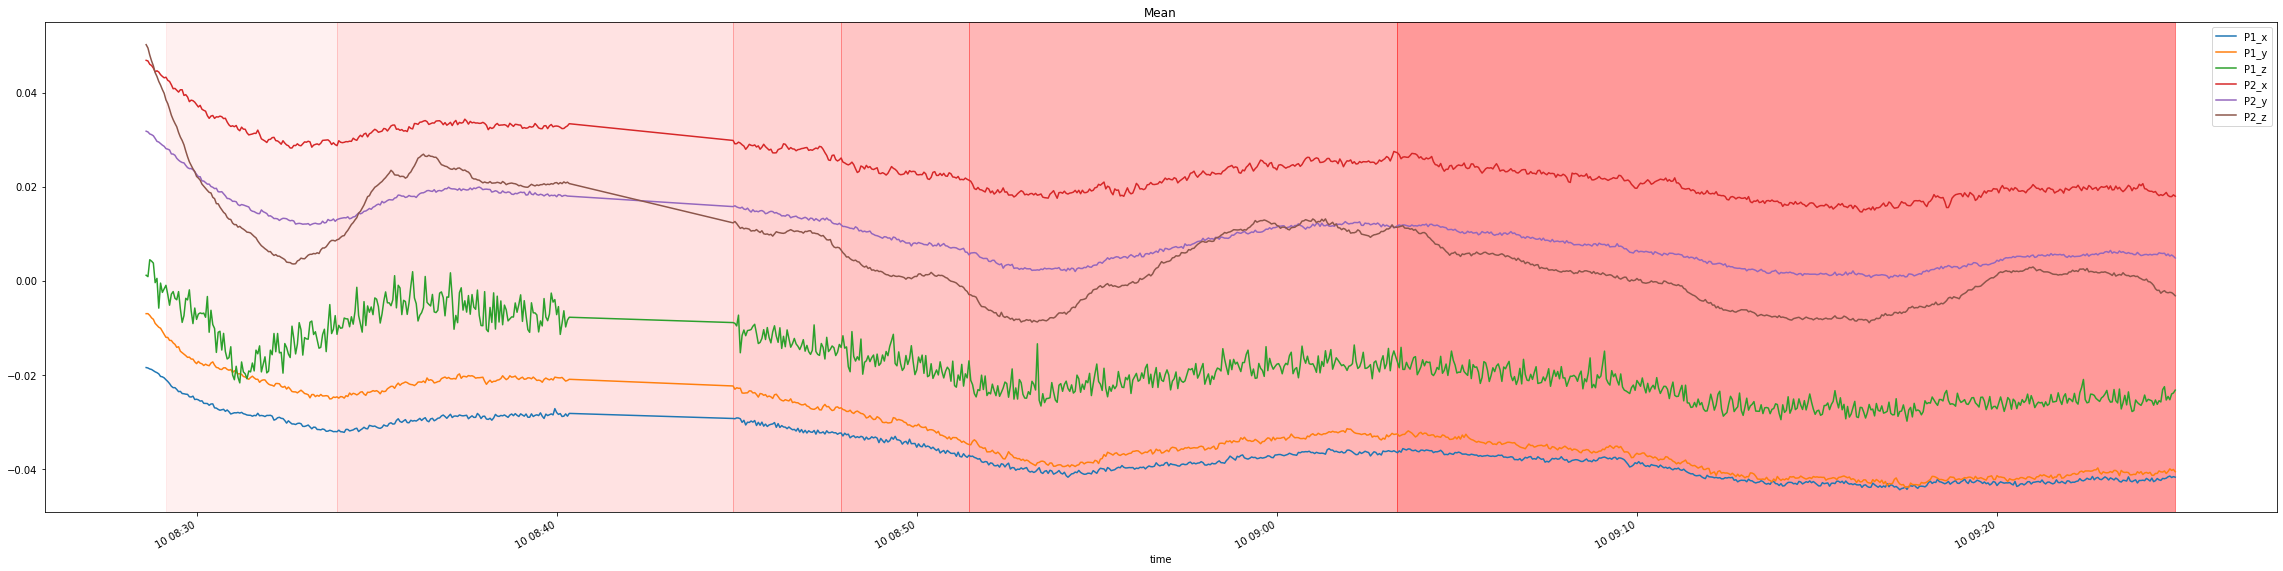

In [12]:
plot_total_df(
    statistical_features_train["mean"][visualize_columns], 
    "Mean", 
    changes=changes_gt, 
    max_intensity=0.4
)

Changes in stream distribution occurred at:
	2013-01-10 08:29:08.281000
	2013-01-10 08:33:53.296000
	2013-01-10 08:44:53.328000
	2013-01-10 08:47:53.343000
	2013-01-10 08:51:26.343000
	2013-01-10 09:03:20.375000


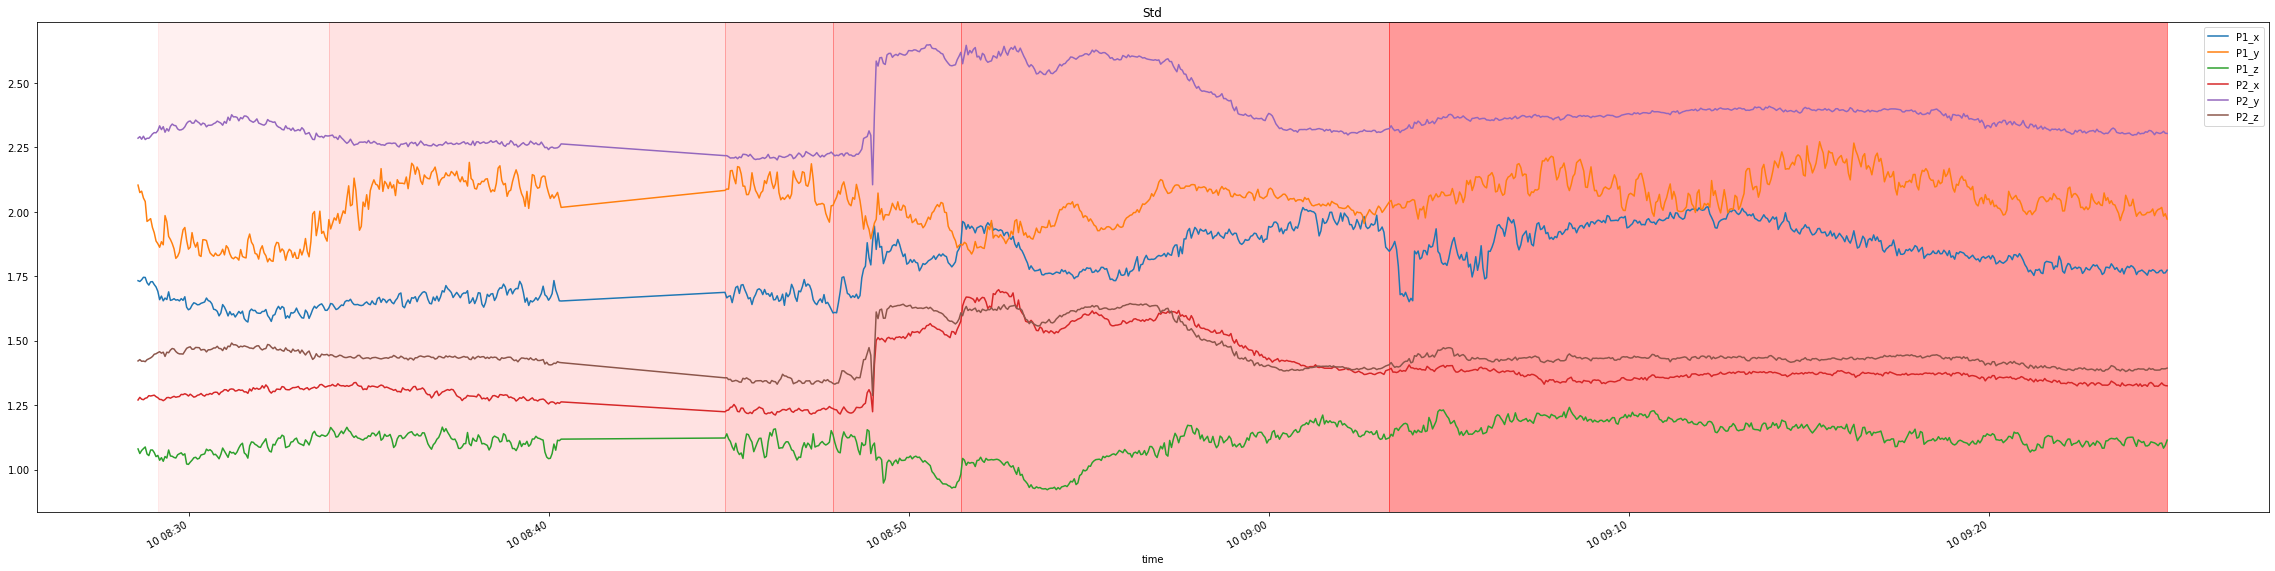

In [13]:
plot_total_df(
    statistical_features_train["std"][visualize_columns], 
    "Std", 
    changes=changes_gt, 
    max_intensity=0.4
)

Changes in stream distribution occurred at:
	2013-01-10 08:29:08.281000
	2013-01-10 08:33:53.296000
	2013-01-10 08:44:53.328000
	2013-01-10 08:47:53.343000
	2013-01-10 08:51:26.343000
	2013-01-10 09:03:20.375000


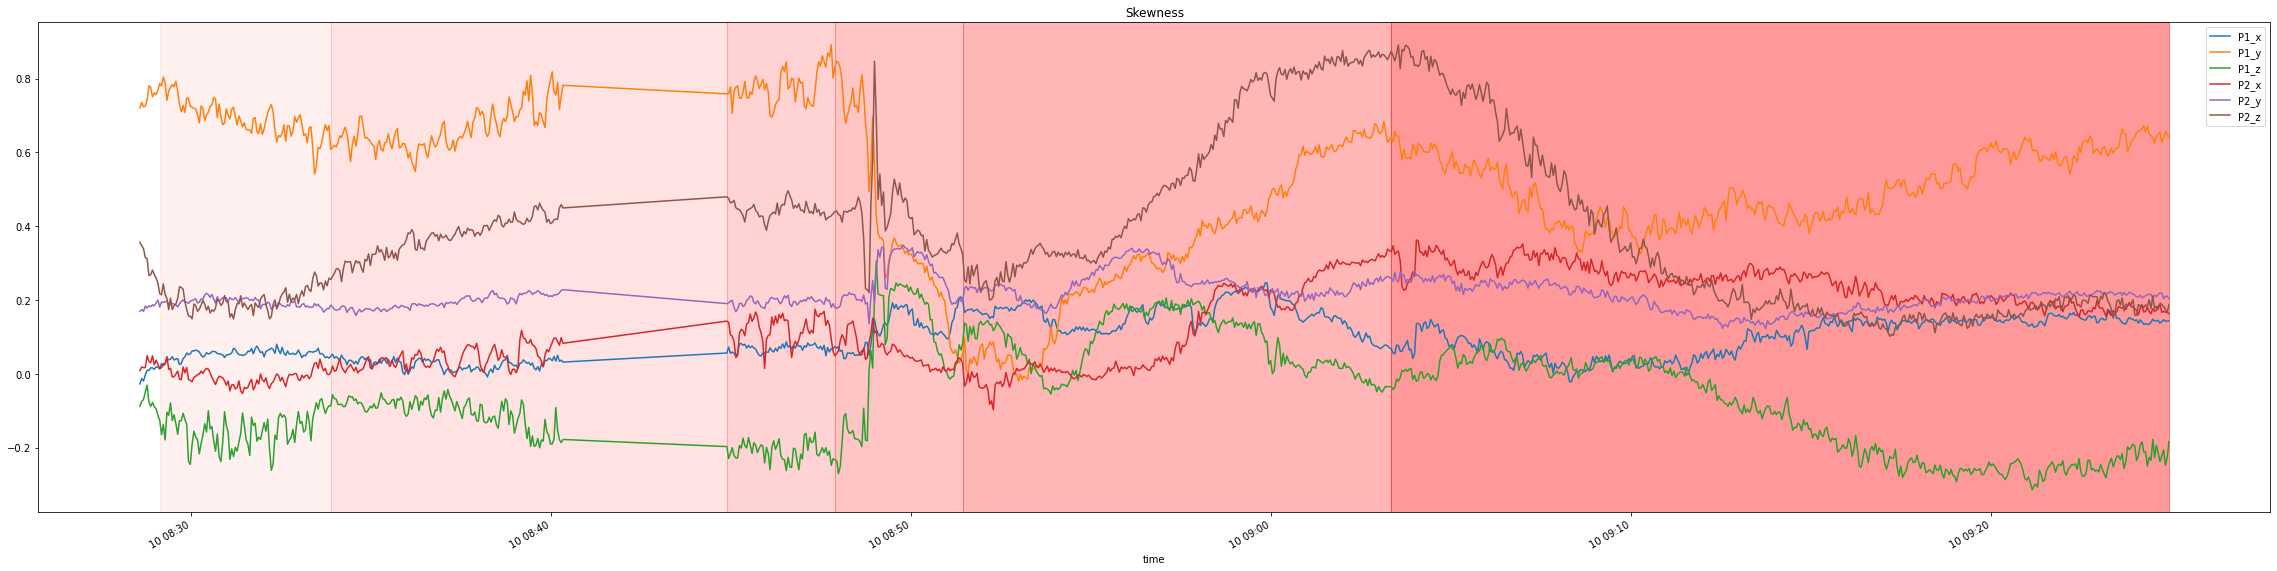

In [14]:
plot_total_df(
    statistical_features_train["skewness"][visualize_columns], 
    "Skewness", 
    changes=changes_gt, 
    max_intensity=0.4
)

Changes in stream distribution occurred at:
	2013-01-10 08:29:08.281000
	2013-01-10 08:33:53.296000
	2013-01-10 08:44:53.328000
	2013-01-10 08:47:53.343000
	2013-01-10 08:51:26.343000
	2013-01-10 09:03:20.375000


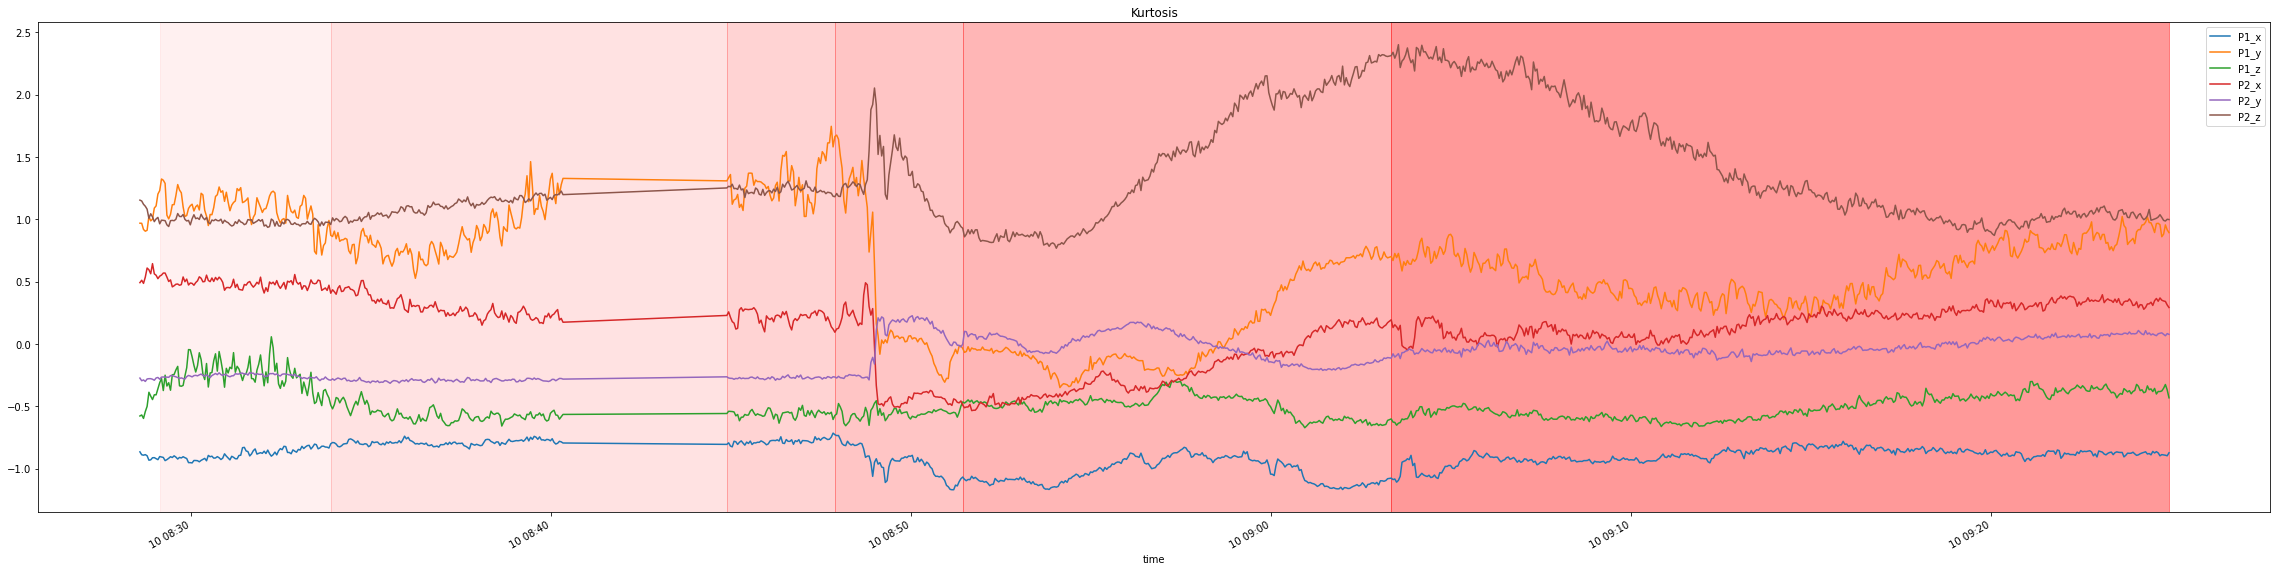

In [15]:
plot_total_df(
    statistical_features_train["kurtosis"][visualize_columns], 
    "Kurtosis", 
    changes=changes_gt, 
    max_intensity=0.4
)

We can see something different going on in highlighted zones, however we are viewing 6 series at same time.

Let us visualize an averaged signal to see if we still preserve the trend.

In [16]:
statistical_features_averaged_train = {k: average_signal_columns(df) for (k, df) in statistical_features_train.items()}

Changes in stream distribution occurred at:
	2013-01-10 08:29:08.281000
	2013-01-10 08:33:53.296000
	2013-01-10 08:44:53.328000
	2013-01-10 08:47:53.343000
	2013-01-10 08:51:26.343000
	2013-01-10 09:03:20.375000


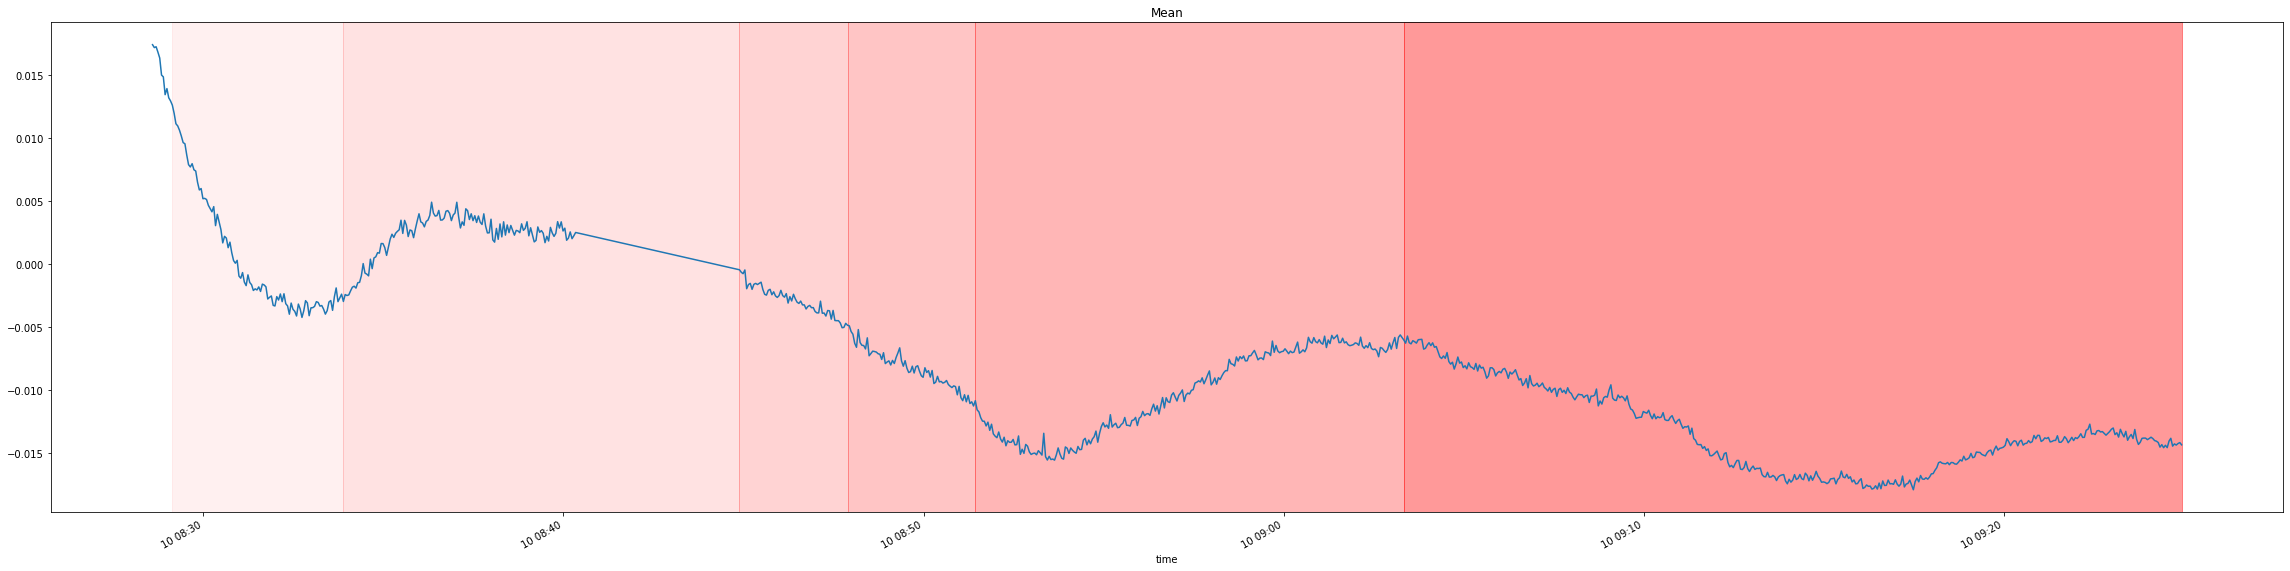

In [17]:
plot_total_df(
    statistical_features_averaged_train["mean"]["average_column"], 
    "Mean", 
    changes=changes_gt, 
    max_intensity=0.4
)

Changes in stream distribution occurred at:
	2013-01-10 08:29:08.281000
	2013-01-10 08:33:53.296000
	2013-01-10 08:44:53.328000
	2013-01-10 08:47:53.343000
	2013-01-10 08:51:26.343000
	2013-01-10 09:03:20.375000


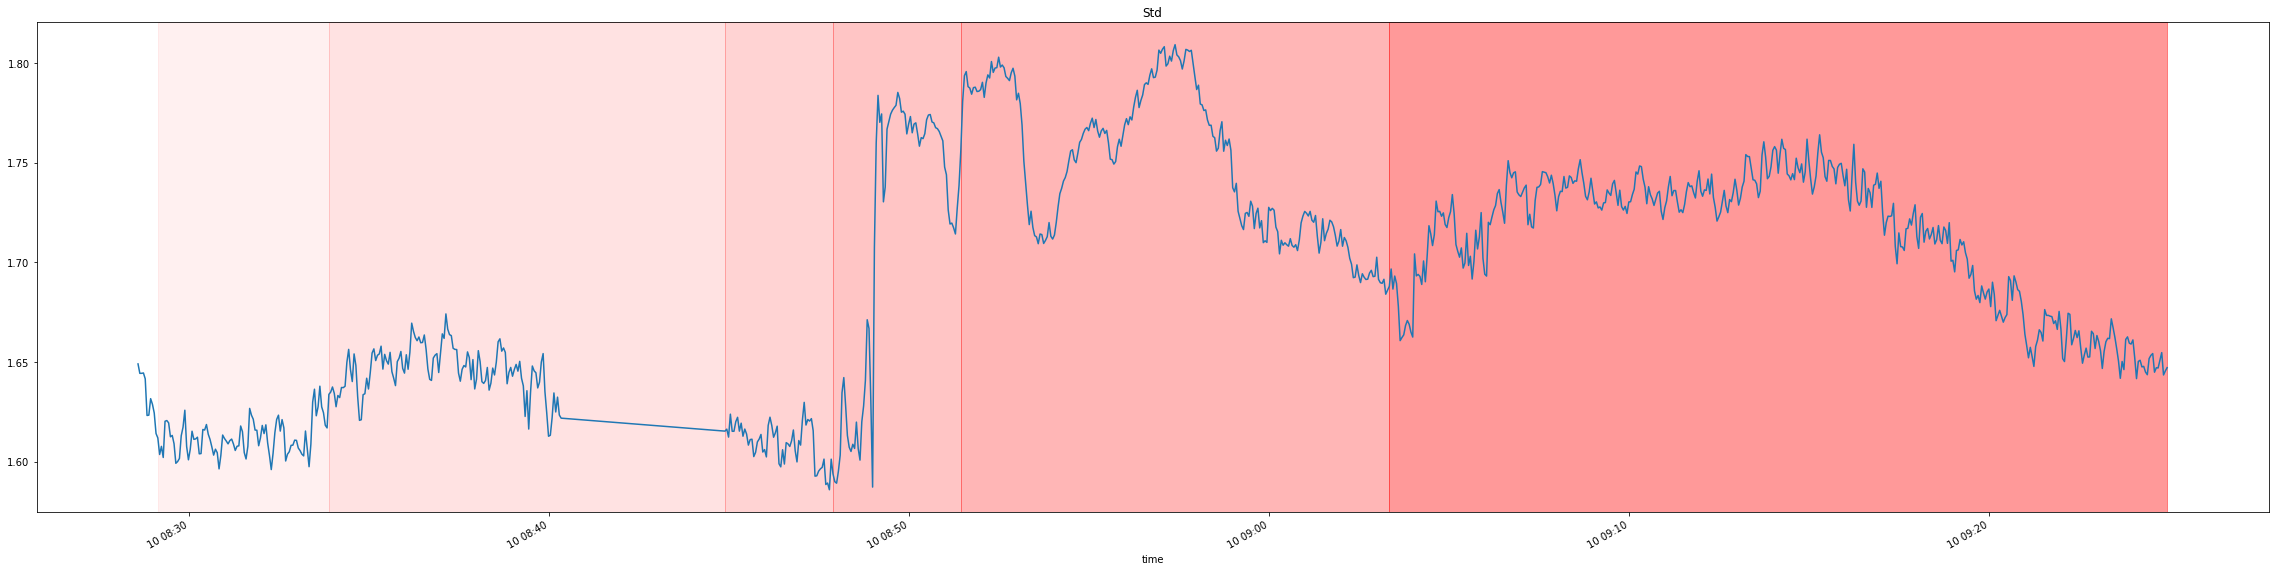

In [18]:
plot_total_df(
    statistical_features_averaged_train["std"]["average_column"], 
    "Std", 
    changes=changes_gt, 
    max_intensity=0.4
)

Changes in stream distribution occurred at:
	2013-01-10 08:29:08.281000
	2013-01-10 08:33:53.296000
	2013-01-10 08:44:53.328000
	2013-01-10 08:47:53.343000
	2013-01-10 08:51:26.343000
	2013-01-10 09:03:20.375000


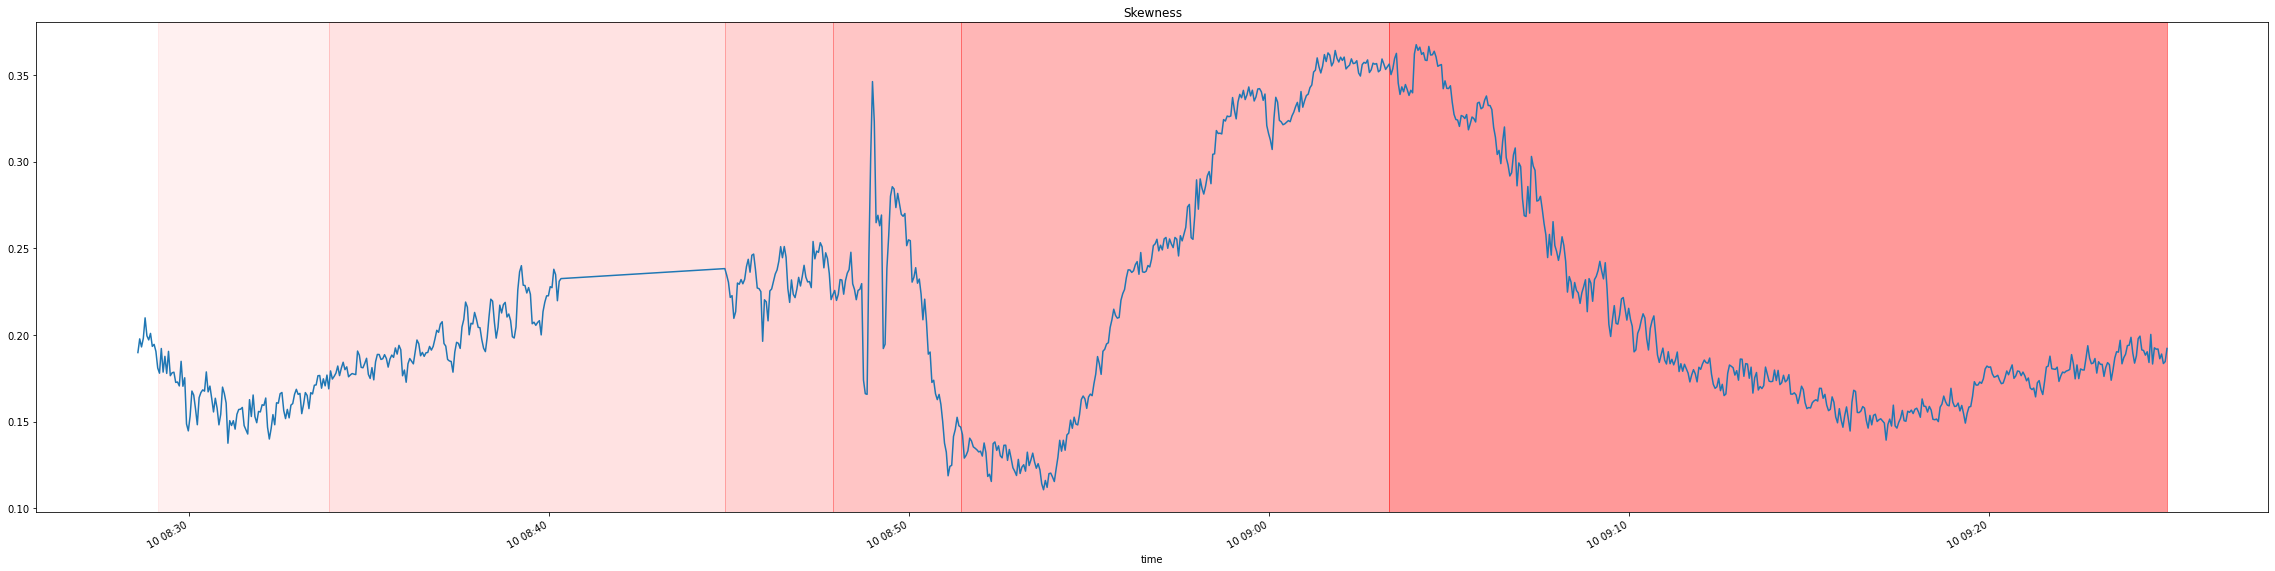

In [19]:
plot_total_df(
    statistical_features_averaged_train["skewness"]["average_column"], 
    "Skewness", 
    changes=changes_gt, 
    max_intensity=0.4
)

Changes in stream distribution occurred at:
	2013-01-10 08:29:08.281000
	2013-01-10 08:33:53.296000
	2013-01-10 08:44:53.328000
	2013-01-10 08:47:53.343000
	2013-01-10 08:51:26.343000
	2013-01-10 09:03:20.375000


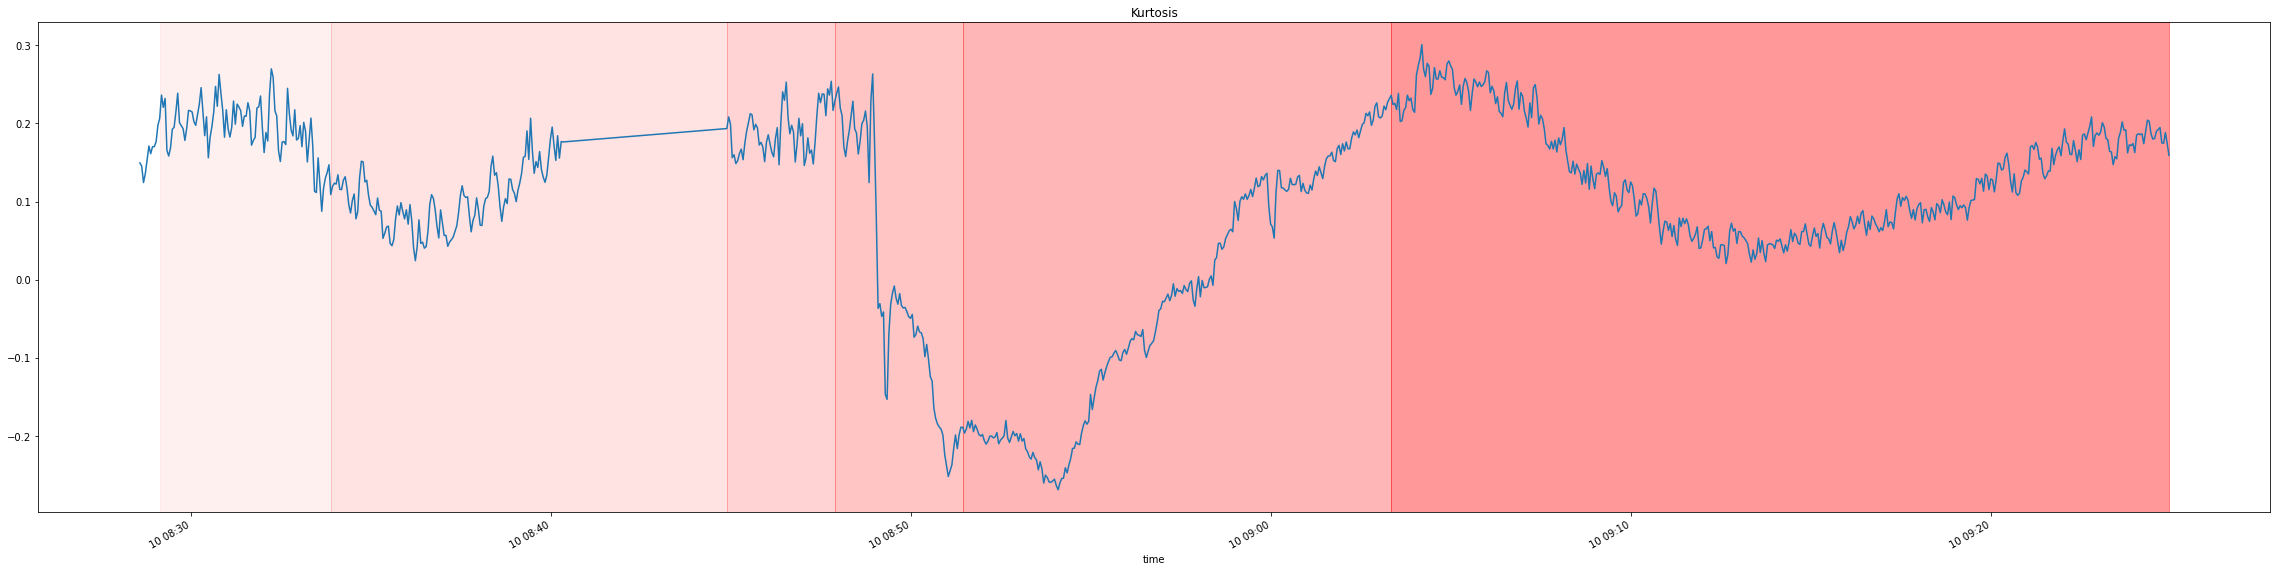

In [20]:
plot_total_df(
    statistical_features_averaged_train["kurtosis"]["average_column"], 
    "Kurtosis", 
    changes=changes_gt, 
    max_intensity=0.4
)

## Distribution drift detection

In [21]:
import numpy as np

def approx_equal(a, b, tol=10**-6):
    return np.abs(a - b) < tol

class MartingaleTestND:
    
    def __init__(self, lmb, epsilon=0.98):
        """
        lambda: threshold value
        epsilon
        """
        self.lmb = lmb
        self.epsilon = epsilon
        self._initialize()
        
    def _initialize(self):
        self.M = [1]
        self.T = [] # online training set
        self.i = 1
        self.strangeness_total = []
        self.changes_history = []
        
    def strangeness(self, T, x_i):
        T = np.array(T)
        #print("T",T.shape)
        #print(x_i.shape)
        #T = np.array(T)
        centroid = np.mean(T, axis=0) # compute cluster of T (unlabeled training set)
        #print("centroid", centroid.shape)
        strangeness_x_i = np.linalg.norm(x_i - centroid)
        #T = T[:, np.newaxis]
        #strangeness_T = np.linalg.norm(T - centroid, axis=1)
        return strangeness_x_i#, strangeness_T.tolist()
    
    def compute_p_value(self, strangeness_total):
        strangeness_total = np.array(strangeness_total)
        p_values = []
        for i in range(len(strangeness_total)):
            theta_i = np.random.uniform()
            p_val = (
                np.sum(strangeness_total[:i] > strangeness_total[i]) + \
                theta_i * np.sum(approx_equal(strangeness_total[:i], strangeness_total[i])) \
            ) / (i + 1)
            # NOTE: p_val can be <= only in case when we have a single strangeness value
            if p_val <= 0:
                p_val = 1.
            p_values.append(p_val)
        return np.array(p_values)
        
    def step(self, observation):
        """
        Performs a step of the test (one loop iteration)
        
        Idea:
        - Algorithm gathers a training set from a stream.
        - When it detects a change in stream distribution, it resets the training set.
        """
        # a new example x_i is observed
        x_i = observation
        if len(self.T) == 0:
            # set strangeness of x_i to 0
            strangeness_x_i = 0.0
        else:
            # compute strangeness of x_i and data points in T
            #strangeness_x_i, strangeness_T = self.strangeness(self.T, x_i)
            strangeness_x_i = self.strangeness(self.T, x_i)
            #self.strangeness_total = strangeness_T
        self.strangeness_total.append(strangeness_x_i)
        # compute P-values p_i using (7)
        p_values = self.compute_p_value(self.strangeness_total)
        p_i = p_values[-1]
        M_i_1 = self.M[-1]
        # Compute M(i) using (6)
        M_i = self.epsilon * (p_i ** (self.epsilon - 1.0)) * M_i_1
        self.M.append(M_i)
        if self.M[-1] > self.lmb:
            # change detected
            # Set M(i) = 1
            self.M[-1] = 1.
            # reinitialize T to empty set
            self.T = []
            self.strangeness_total = []
            test_value = 1 # change
            self.changes_history.append(self.i)
        else:
            self.T.append(x_i)
            test_value = 0 # no change
        # increment i
        self.i += 1
        return test_value

In [22]:
def run_martingale_tester(tester, series):
    test_values = []
    for time, sample in series.items():
        test_value = tester.step(sample)
        test_values.append(test_value)
    test_values = np.array(test_values)
    return tester.changes_history, test_values

def run_martingale_tester_nd(tester, series):
    test_values = []
    for time, sample in enumerate(series.to_numpy()):
        #print(time, sample)
        #raise
        test_value = tester.step(sample)
        test_values.append(test_value)
    test_values = np.array(test_values)
    return tester.changes_history, test_values

In [23]:
martingale_tester = MartingaleTest(10, epsilon=0.98)

In [24]:
changes_pred, _ = run_martingale_tester(
    martingale_tester,
    statistical_features_averaged_train["kurtosis"]["average_column"]
)

Changes in stream distribution occurred at:
	2013-01-10 08:50:20.343000
	2013-01-10 08:59:35.375000
	2013-01-10 09:11:35.406000
	2013-01-10 09:21:56.437000


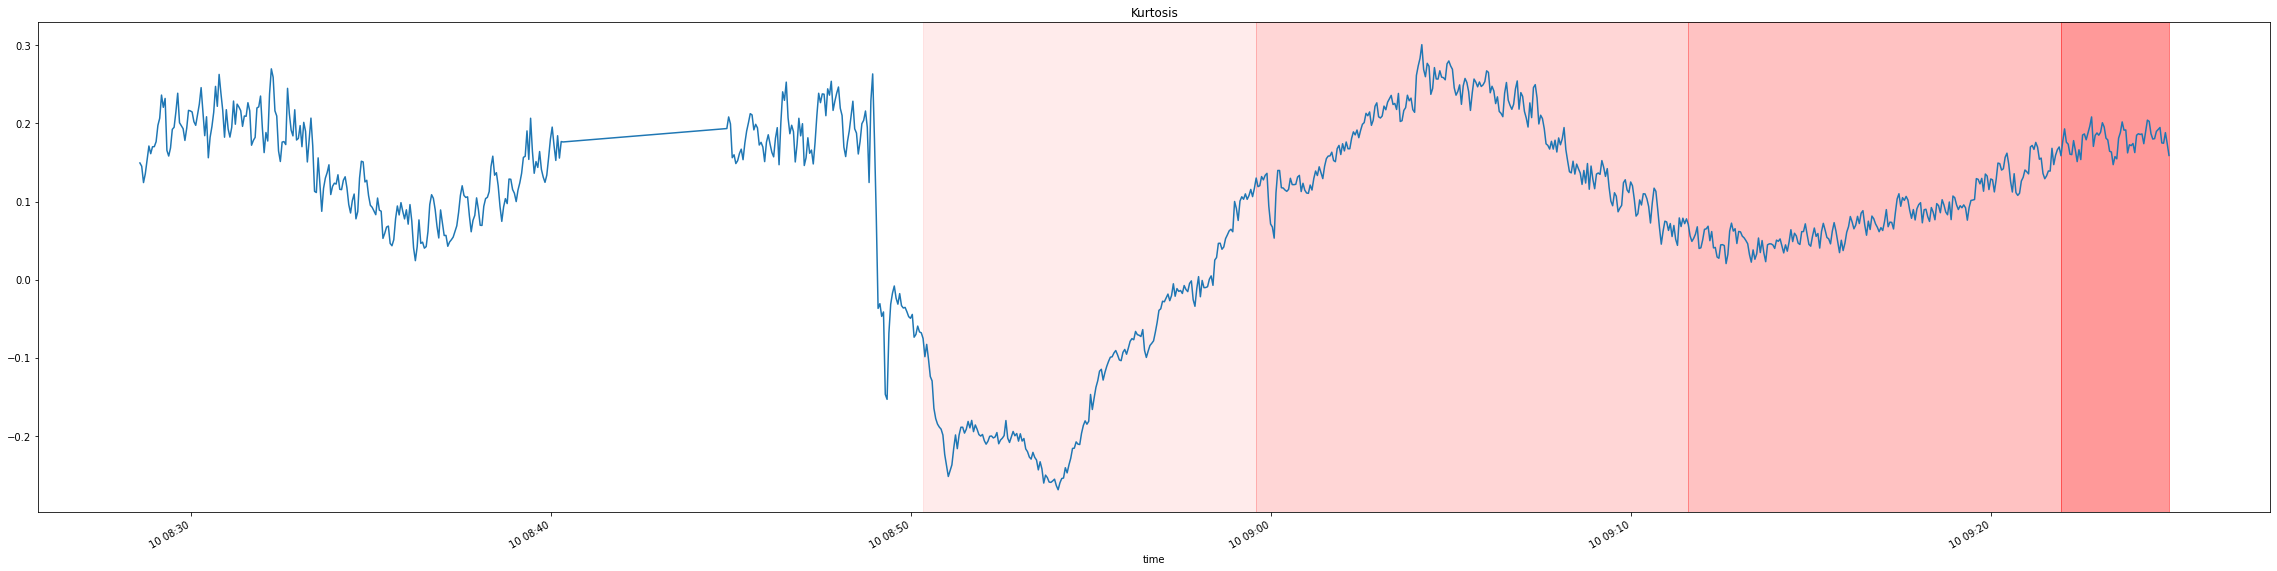

In [25]:
plot_total_df(
    statistical_features_averaged_train["kurtosis"]["average_column"], 
    "Kurtosis", 
    changes=changes_pred, 
    max_intensity=0.4
)

In [60]:
import matplotlib.pyplot as plt

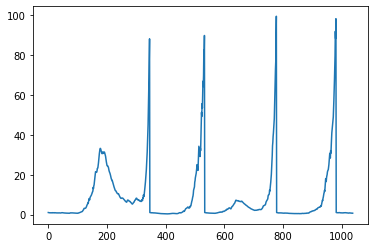

In [87]:
plt.plot(martingale_tester.M)

In [93]:
statistical_features_train["kurtosis"][visualize_columns].to_numpy()

array([[-0.8659123 ,  0.96880626, -0.57810437,  0.49176948, -0.27402537,
         1.15390892],
       [-0.88930541,  0.96791063, -0.56992459,  0.51098214, -0.29532747,
         1.14693036],
       [-0.89261435,  0.91857845, -0.59771266,  0.48585558, -0.28887189,
         1.12050173],
       ...,
       [-0.89301232,  0.9552684 , -0.3255897 ,  0.34109341,  0.06553776,
         0.98613347],
       [-0.8972865 ,  0.91569522, -0.36873816,  0.31275705,  0.0830616 ,
         1.00025997],
       [-0.87354222,  0.89303873, -0.4322724 ,  0.29215693,  0.07669137,
         0.99810049]])

In [130]:
martingale_tester_nd = MartingaleTestND(4, epsilon=0.98)

In [131]:
changes_pred_nd, _ = run_martingale_tester_nd(
    martingale_tester_nd,
    statistical_features_train["kurtosis"][visualize_columns]
)

Changes in stream distribution occurred at:
	2013-01-10 08:44:56.328000


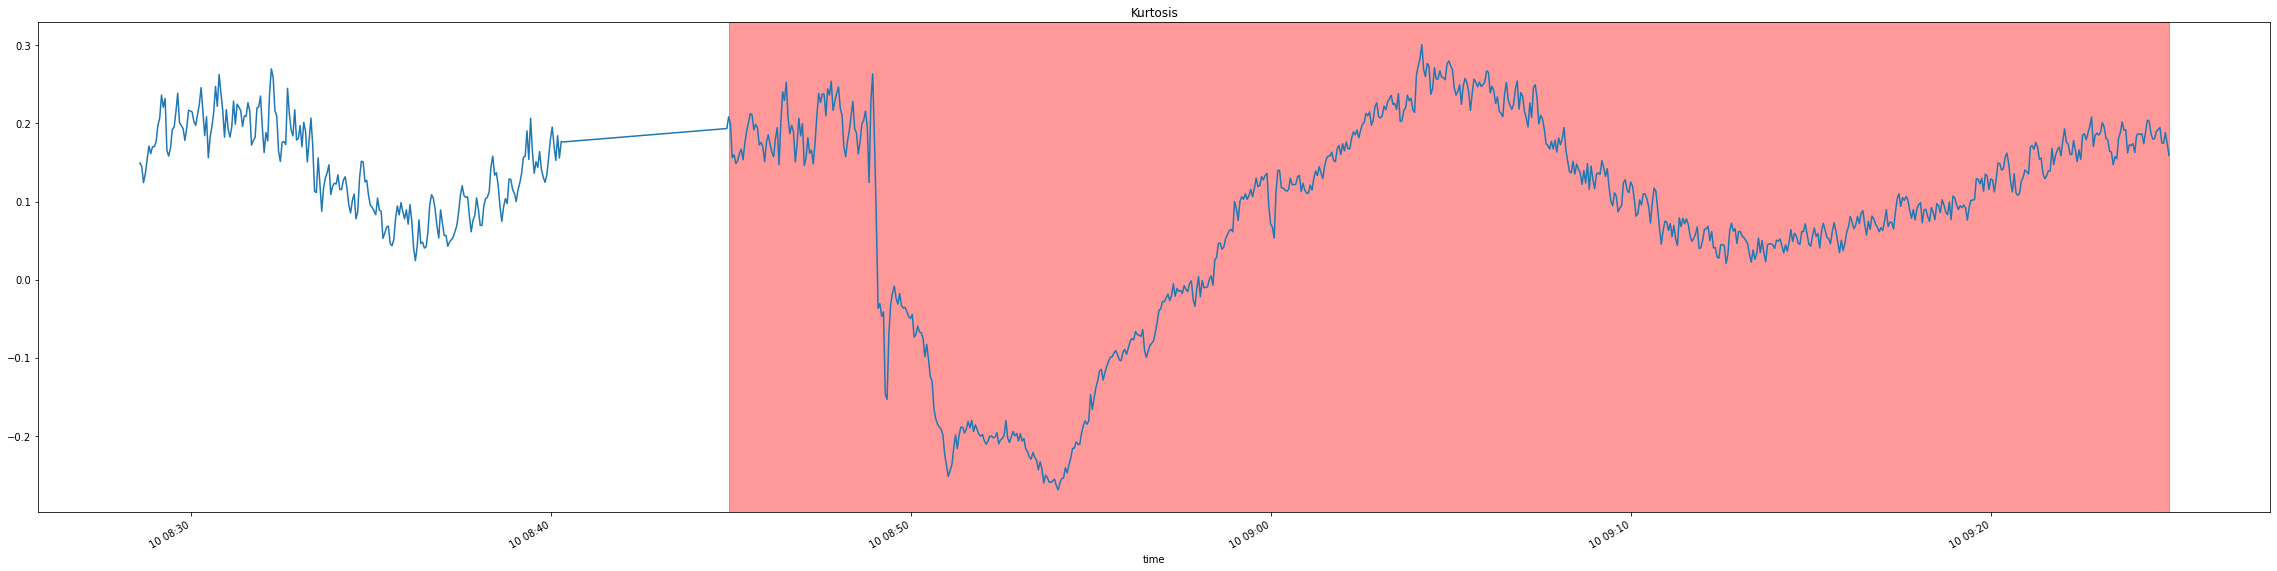

In [132]:
plot_total_df(
    statistical_features_averaged_train["kurtosis"]["average_column"], 
    "Kurtosis", 
    changes=changes_pred_nd, 
    max_intensity=0.4
)

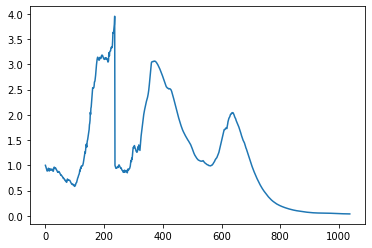

In [133]:
plt.plot(martingale_tester_nd.M)